In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

In [2]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

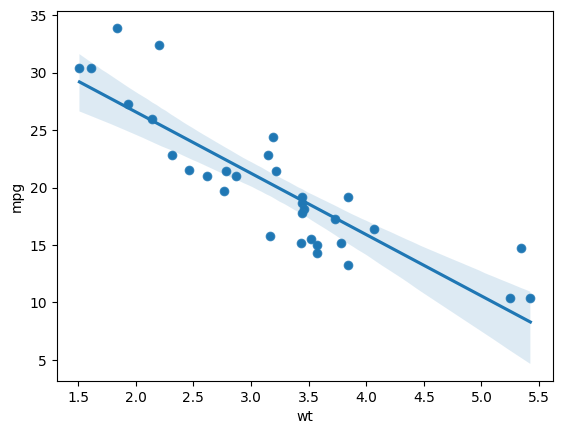

In [3]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [4]:
X_list = cars.wt.values
X_np = np.array(X_list).reshape(-1, 1)
y_list = cars.mpg.values.tolist()
X = torch.tensor(X_np,dtype=torch.float32)
y = torch.tensor(y_list)

In [5]:
weights = torch.randn(1, requires_grad=True, dtype=torch.float32)
bias = torch.randn(1, requires_grad=True, dtype=torch.float32)

epochs = 1000
learning_rate = 0.001

In [6]:
for epoch in range(epochs):
    for i in range(len(X)):
        y_pred = X[i] * weights + bias
        loss = torch.pow(y_pred - y[i], 2)
        loss.backward()
        loss_value = loss.data[0]
        with torch.no_grad():
            weights -= learning_rate * weights.grad
            bias -= learning_rate * bias.grad
            weights.grad.zero_()
            bias.grad.zero_()
    print(f'Epoch: {epoch}, Loss: {loss_value}')

Epoch: 0, Loss: 152.94798278808594
Epoch: 1, Loss: 79.21177673339844
Epoch: 2, Loss: 53.492088317871094
Epoch: 3, Loss: 43.270423889160156
Epoch: 4, Loss: 38.77342987060547
Epoch: 5, Loss: 36.59794616699219
Epoch: 6, Loss: 35.41635513305664
Epoch: 7, Loss: 34.67335510253906
Epoch: 8, Loss: 34.127506256103516
Epoch: 9, Loss: 33.672122955322266
Epoch: 10, Loss: 33.259521484375
Epoch: 11, Loss: 32.86835861206055
Epoch: 12, Loss: 32.489009857177734
Epoch: 13, Loss: 32.117027282714844
Epoch: 14, Loss: 31.75058364868164
Epoch: 15, Loss: 31.388700485229492
Epoch: 16, Loss: 31.03095245361328
Epoch: 17, Loss: 30.677156448364258
Epoch: 18, Loss: 30.327133178710938
Epoch: 19, Loss: 29.98086166381836
Epoch: 20, Loss: 29.638280868530273
Epoch: 21, Loss: 29.2993106842041
Epoch: 22, Loss: 28.963953018188477
Epoch: 23, Loss: 28.632137298583984
Epoch: 24, Loss: 28.303857803344727
Epoch: 25, Loss: 27.97908592224121
Epoch: 26, Loss: 27.657732009887695
Epoch: 27, Loss: 27.33978843688965
Epoch: 28, Loss: 2

In [7]:
print(f'Weight: {weights.item()}, Bias: {bias.item()}')

Weight: -5.230320930480957, Bias: 36.80857467651367


<Axes: >

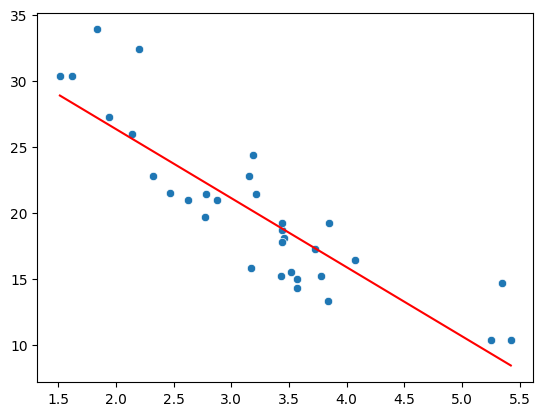

In [8]:
y_pred = (torch.tensor(X_list)*weights+bias).detach().cpu().numpy()
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')